<center style="font-size: 30px;"><b>Лабораторна робота 4</center>
<center style="font-size: 20px;"><b>Аналіз та математичне моделювання COVID-19 за моделлю SIR</center>


<ol>
<li><b>Мета роботи</b><br><br>Навчитися працювати з наборами даних з платформи Kaggle на прикладі набору даних про Covid-19. Ознайомитись та навчитись використовувати модель SIR (математична модель для розуміння спалаху інфекційних захворювань). Навчитись аналізувати тренди змін захворюваності.
</li><br>
<li><b>Дані та приклади</b><br><br>За наведеним посиланням знаходяться приклади, де аналізується взаємозв’язок заходів проти COVID-19 та кількості інфікованих. Мета – проаналізувати хід захворюваності та спрогнозувати можливий стан захворюваності в країні, що може допомогти швидше врегулювати ситуацію.
В приладі використана модель SIR-F, похідною від моделі SIR. Оцінка параметрів SIR-F застосована до підмножин даних часових рядів у кожній країні. Точки зміни параметрів визначаються аналізом тенденцій S-R. Подробиці пояснені в розділі «Метод».
</li><br>
<li><b>Завдання</b><br><br>Лабораторну роботу можна виконувати в Kaggle, Colaboratory, IPython Notebook (або будь якому іншому програмному забезпеченні).
<ol>
<li>Проаналізувати в яких країнах наразі відбувається спалах захворювань, а в яких відбувається затухання захворювань.</li>
<li>Згідно уподобань з переліку обрати одну країну, в якій відбувається спалах, та одну країну, для якої відбувається затухання, та застосувати до неї модель SIR-F. (в даному випадку задача вибору країни є творчою, можна також орієнтуватися на їх географічне розташування, кількість населення тощо).
</li>
<li>Для обраних країн визначити параметри моделі (theta, kappa, rho, sigma, tau, …), вивести їх на графіку з плином часу.
</li>
<li>Спрогнозувати показники Infected, Fatal, Recovered  з використанням отриманих параметрів на 7, 30 та 300 днів.
</li>
<li>Визначити найближчий пік захворюваності (дата).
</li>
<li>Визначити коли в країні не залишиться хворих на Covid-2019.</li>
<li>Порівняти отримані результати для обраних країн.
</li>
<li>Отримані результати оформити у вигляді звіту до лабораторної роботи.</li>
</ol>
</li>
</ol>

In [1]:
pip install --upgrade covsirphy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [4]:
# Функція для підготовки даних
def prepare_time_series(country):
    country_data = data[data["location"] == country].fillna(0)
    time_series = {
        "date": pd.to_datetime(country_data["date"]),
        "susceptible": country_data["population"] - country_data["total_cases"],
        "infected": country_data["total_cases"] - country_data["total_deaths"],
        "recovered": country_data["total_cases"] - country_data["total_deaths"],
        "fatalities": country_data["total_deaths"],
    }
    return pd.DataFrame(time_series)

In [5]:
# Дані для України та Італії
ukraine_ts = prepare_time_series("Ukraine")
italy_ts = prepare_time_series("Italy")

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Побудова графіків на основі даних
def plot_time_series(ts_data, country_name):
    plt.figure(figsize=(12, 6))
    plt.plot(ts_data["date"], ts_data["susceptible"], label="Сприйнятливі")
    plt.plot(ts_data["date"], ts_data["infected"], label="Інфіковані")
    plt.plot(ts_data["date"], ts_data["recovered"], label="Одужалі")
    plt.plot(ts_data["date"], ts_data["fatalities"], label="Смерті")
    plt.xlabel("Дата")
    plt.ylabel("Кількість людей")
    plt.title(f"Часовий ряд для {country_name}")
    plt.legend()
    plt.show()

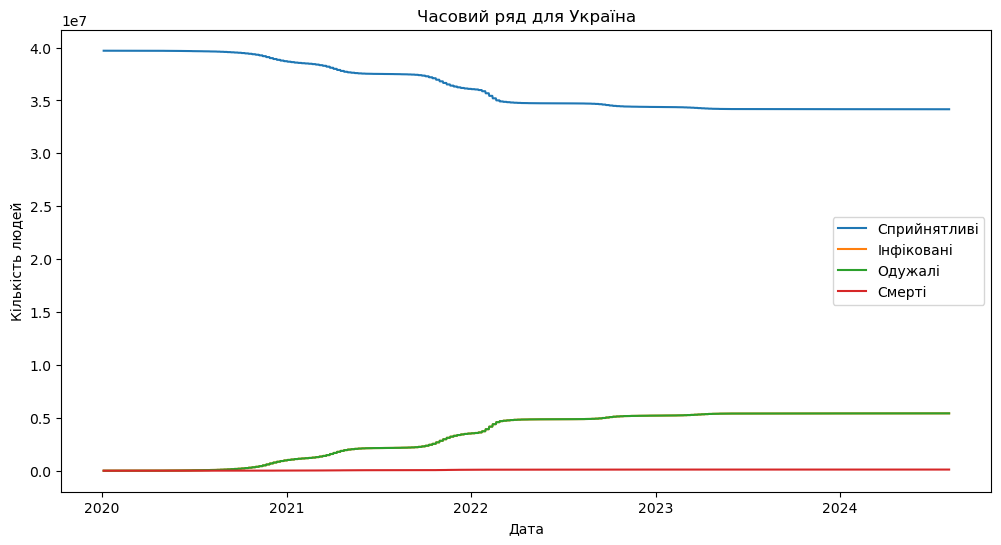

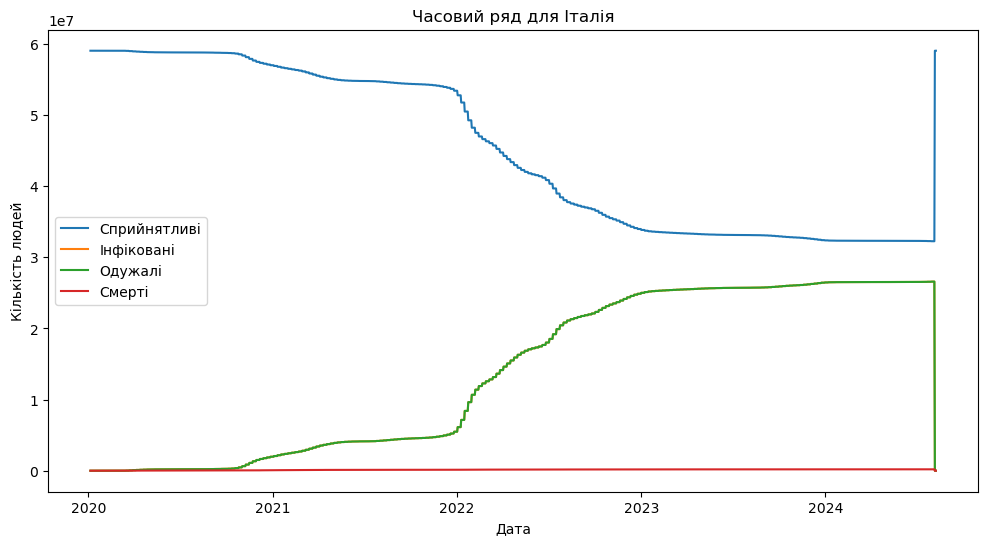

In [8]:
# Побудова графіків для України та Італії
plot_time_series(ukraine_ts, "Україна")
plot_time_series(italy_ts, "Італія")

In [9]:
from scipy.integrate import odeint

In [ ]:
def sirf_model(y, t, beta, gamma, alpha):
    S, I, R, F = y
    N = S + I + R + F
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - alpha * I
    dRdt = gamma * I
    dFdt = alpha * I
    return [dSdt, dIdt, dRdt, dFdt]

In [ ]:
# Початкові параметри для України
S0_ukraine = ukraine_ts["susceptible"].iloc[0]
I0_ukraine = ukraine_ts["infected"].iloc[0]
R0_ukraine = ukraine_ts["recovered"].iloc[0]
F0_ukraine = ukraine_ts["fatalities"].iloc[0]
y0_ukraine = [S0_ukraine, I0_ukraine, R0_ukraine, F0_ukraine]

# Початкові параметри для Італії
S0_italy = italy_ts["susceptible"].iloc[0]
I0_italy = italy_ts["infected"].iloc[0]
R0_italy = italy_ts["recovered"].iloc[0]
F0_italy = italy_ts["fatalities"].iloc[0]
y0_italy = [S0_italy, I0_italy, R0_italy, F0_italy]

In [ ]:
# Параметри моделі (адаптуємо їх для обох країн)
beta, gamma, alpha = 0.2, 0.1, 0.01  # Передача, одужання, смертність

In [ ]:
import numpy as np

In [ ]:
# Часовий інтервал
t_ukraine = np.linspace(0, len(ukraine_ts), len(ukraine_ts))
t_italy = np.linspace(0, len(italy_ts), len(italy_ts))

In [13]:
# Початкові умови для України
y0_ukraine = [
    ukraine_ts["susceptible"].iloc[0],
    ukraine_ts["infected"].iloc[0],
    ukraine_ts["recovered"].iloc[0],
    ukraine_ts["fatalities"].iloc[0],
]
t_ukraine = np.linspace(0, len(ukraine_ts), len(ukraine_ts))

# Інтеграція для України
ret_ukraine = odeint(sirf_model, y0_ukraine, t_ukraine, args=(beta, gamma, alpha))
S_ukraine, I_ukraine, R_ukraine, F_ukraine = ret_ukraine.T

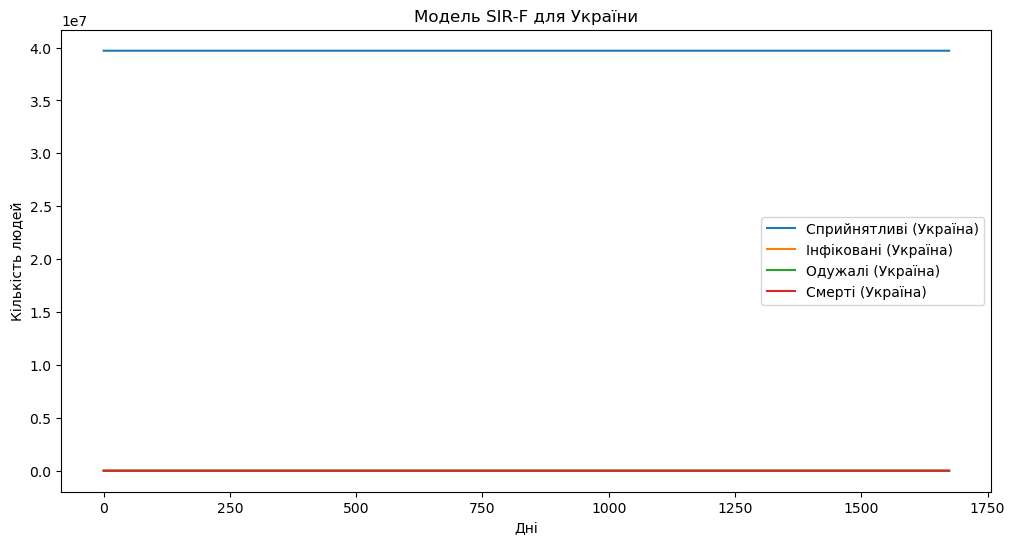

In [14]:
# Графік для України
plt.figure(figsize=(12, 6))
plt.plot(t_ukraine, S_ukraine, label="Сприйнятливі (Україна)")
plt.plot(t_ukraine, I_ukraine, label="Інфіковані (Україна)")
plt.plot(t_ukraine, R_ukraine, label="Одужалі (Україна)")
plt.plot(t_ukraine, F_ukraine, label="Смерті (Україна)")
plt.xlabel("Дні")
plt.ylabel("Кількість людей")
plt.title("Модель SIR-F для України")
plt.legend()
plt.show()